# Importing packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Data Collection

#### Reading the dataset


In [2]:
df = pd.read_csv('Airlines.csv')
df

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...,...
539378,539379,CO,178,OGG,SNA,5,1439,326,0
539379,539380,FL,398,SEA,ATL,5,1439,305,0
539380,539381,FL,609,SFO,MKE,5,1439,255,0
539381,539382,UA,78,HNL,SFO,5,1439,313,1


#### First five rows


In [3]:
df.head(5)

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


#### Last five rows


In [4]:
df.tail(1)

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
539382,539383,US,1442,LAX,PHL,5,1439,301,1


#### Random five rows 


In [5]:
df.sample(5)

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
220178,220179,MQ,4413,LGA,XNA,1,1090,220,0
127097,127098,OO,4460,BZN,SLC,3,690,71,0
312324,312325,MQ,3859,IAH,ORD,7,405,155,0
190455,190456,WN,2672,MCO,STL,7,475,155,0
407267,407268,WN,2327,RNO,LAX,5,590,85,0


#### Information about dataset


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


## Statistics Analysis


#### Mean of values

In [7]:
mean_Time = df['Time'].mean()
print(mean_Time)

802.7289625368245


In [8]:
mean_length = df['Length'].mean()
print(mean_length)

132.20200673732765


#### Median of values

In [9]:
median_Time = df['Time'].mean()
print(median_Time)

802.7289625368245


In [10]:
median_length = df['Length'].mean()
print(median_length)

132.20200673732765


#### Mode of Values



In [11]:
Most_going_airline = df['Airline'].mode()[0]
print(Most_going_airline)

WN


In [12]:
Most_going_flight_number = df['Flight'].mode()[0]
print(Most_going_flight_number)

16


#### Maximum value

In [13]:
max_Time = df['Time'].max()
print(max_Time)

1439


In [14]:
max_Length = df['Length'].max()
print(max_Length)

655


#### Minimum value

In [15]:
min_Time = df['Time'].min()
print(min_Time)

10


In [16]:
min_Length = df['Length'].min()
print(min_Length)

0


#### Percentiles

###### Top 25 percentile

In [17]:
Top_25_Time = df['Time'].quantile(0.25)
print(Top_25_Time)

565.0


In [18]:
Top_25_Length = df['Length'].quantile(0.25)
print(Top_25_Length)

81.0


###### Top 50 percentile

In [19]:
Top_75_Time = df['Time'].quantile(0.75)
print(Top_75_Time)

1035.0


In [20]:
Top_75_Length = df['Length'].quantile(0.75)
print(Top_75_Length)

162.0


#### Variance and Standard Deviation 

In [21]:
Standard_dev_Time = df['Time'].std()
print(Standard_dev_Time)
print("Variance Time is ",(Standard_dev_Time)**2)

278.04591081679
Variance Time is  77309.52852193835


In [22]:
Standard_dev_Length = df['Length'].std()
print(Standard_dev_Length)
print("Variance Length is ",(Standard_dev_Length)**2)

70.11701559746602
Variance Length is  4916.395876295293


In [23]:
df.describe()

,id,Flight,DayOfWeek,Time,Length,Delay
count,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.000000,2427.928630,3.929668,802.728963,132.202007,0.445442
std,155706.604461,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.000000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.500000,712.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.000000,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.500000,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.000000,7814.000000,7.000000,1439.000000,655.000000,1.000000


# Data Preprocessing

#### Null values

In [24]:
# Checking for null values
df.isna().sum()

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

#### Duplicate values

In [25]:
# Checking for duplicate values 
df.duplicated().sum()

np.int64(0)

In [26]:
# Checking for duplicate values in 'id' column as id should be unique
df['id'].duplicated().sum()

np.int64(0)

#### Feature Engineering

###### Changing DayOfWeek column to names

In [27]:
day = { 1: 'Monday',2: 'Tuesday',3: 'Wednesday',4: 'Thursday',5: 'Friday',6: 'Saturday',7: 'Sunday'}
df['Day of Week'] = df['DayOfWeek'].replace(day)

In [28]:
df = df.drop(columns = 'DayOfWeek')

###### Changing 'AirportFrom' column to 'Origin Airport'

In [29]:
df = df.rename(columns={'AirportFrom': 'Origin Airport'})

###### 
Changing 'AirportTo' column to 'Destination Airport'

In [30]:
df = df.rename(columns={'AirportTo': 'Destination Airport'})

###### Changing 'Length' to 'Distance'

In [31]:
df = df.rename(columns={'Length': 'Distance'})

###### Creating 'Route' column

In [32]:
df['Route'] = df['Origin Airport'].astype(str) + '-' + df['Destination Airport'].astype(str)
df['Route'] = df['Route'].astype('category')

In [33]:
df.head()

,id,Airline,Flight,Origin Airport,Destination Airport,Time,Distance,Delay,Day of Week,Route
0,1,CO,269,SFO,IAH,15,205,1,Wednesday,SFO-IAH
1,2,US,1558,PHX,CLT,15,222,1,Wednesday,PHX-CLT
2,3,AA,2400,LAX,DFW,20,165,1,Wednesday,LAX-DFW
3,4,AA,2466,SFO,DFW,20,195,1,Wednesday,SFO-DFW
4,5,AS,108,ANC,SEA,30,202,0,Wednesday,ANC-SEA


###### Remove 'id'column as it is unwanted

In [34]:
df = df.drop(columns = 'id')

###### Finding unique values in columns

In [35]:
df['Airline'].unique()

array(['CO', 'US', 'AA', 'AS', 'DL', 'B6', 'HA', 'OO', '9E', 'OH', 'EV',
       'XE', 'YV', 'UA', 'MQ', 'FL', 'F9', 'WN'], dtype=object)

In [36]:
df['Origin Airport'].unique()

array(['SFO', 'PHX', 'LAX', 'ANC', 'LAS', 'SLC', 'DEN', 'ONT', 'FAI',
       'BQN', 'PSE', 'HNL', 'BIS', 'IYK', 'EWR', 'BOS', 'MKE', 'GFK',
       'OMA', 'GSO', 'LMT', 'SEA', 'MCO', 'TPA', 'DLH', 'MSP', 'FAR',
       'MFE', 'MSY', 'VPS', 'BWI', 'MAF', 'LWS', 'RST', 'ALB', 'DSM',
       'CHS', 'MSN', 'JAX', 'SAT', 'PNS', 'BHM', 'LIT', 'SAV', 'BNA',
       'ICT', 'ECP', 'DHN', 'MGM', 'CAE', 'PWM', 'ACV', 'EKO', 'PHL',
       'ATL', 'PDX', 'RIC', 'BTR', 'HRL', 'MYR', 'TUS', 'SBN', 'CAK',
       'TVC', 'CLE', 'ORD', 'DAY', 'MFR', 'BTV', 'TLH', 'TYS', 'DFW',
       'FLL', 'AUS', 'CHA', 'CMH', 'LRD', 'BRO', 'CRP', 'LAN', 'PVD',
       'FWA', 'JFK', 'LGA', 'OKC', 'PIT', 'PBI', 'ORF', 'DCA', 'AEX',
       'SYR', 'SHV', 'VLD', 'BDL', 'FAT', 'BZN', 'RDM', 'LFT', 'IPL',
       'EAU', 'ERI', 'BUF', 'IAH', 'MCI', 'AGS', 'ABI', 'GRR', 'LBB',
       'CLT', 'LEX', 'MBS', 'MOD', 'AMA', 'SGF', 'AZO', 'ABE', 'SWF',
       'BGM', 'AVP', 'FNT', 'GSP', 'ATW', 'ITH', 'TUL', 'COS', 'ELP',
       'ABQ', 'SMF',

In [37]:
df['Destination Airport'].unique()

array(['IAH', 'CLT', 'DFW', 'SEA', 'MSP', 'DTW', 'ORD', 'ATL', 'PDX',
       'JFK', 'SLC', 'HNL', 'PHX', 'MCO', 'OGG', 'LAX', 'KOA', 'ITO',
       'SFO', 'MIA', 'IAD', 'SMF', 'PHL', 'LIH', 'DEN', 'LGA', 'MEM',
       'CVG', 'YUM', 'CWA', 'MKE', 'BQN', 'FAI', 'LAS', 'ANC', 'BOS',
       'LGB', 'FLL', 'SJU', 'EWR', 'DCA', 'BWI', 'RDU', 'MCI', 'TYS',
       'SAN', 'ONT', 'OAK', 'MDW', 'BNA', 'DAL', 'CLE', 'JAX', 'JNU',
       'RNO', 'ELP', 'SAT', 'OTZ', 'MBS', 'BDL', 'STL', 'HOU', 'AUS',
       'SNA', 'SJC', 'LIT', 'TUS', 'TUL', 'CMH', 'LAN', 'IND', 'AMA',
       'CRP', 'PIT', 'RKS', 'FWA', 'TPA', 'PBI', 'JAN', 'DSM', 'ADQ',
       'GRB', 'PVD', 'ABQ', 'SDF', 'RSW', 'MSY', 'BUR', 'BOI', 'TLH',
       'BHM', 'ACV', 'ORF', 'BET', 'KTN', 'RIC', 'SRQ', 'BTR', 'XNA',
       'MHT', 'GRR', 'SBN', 'SBA', 'ROA', 'CID', 'GPT', 'MFR', 'SGU',
       'HPN', 'OMA', 'OTH', 'GSP', 'LMT', 'BUF', 'MSN', 'BFL', 'CAE',
       'HRL', 'OKC', 'SYR', 'COS', 'BTV', 'CDC', 'SCC', 'DAY', 'SJT',
       'TVC', 'ROC',

## Data Visualization

### Correlation Heatmap

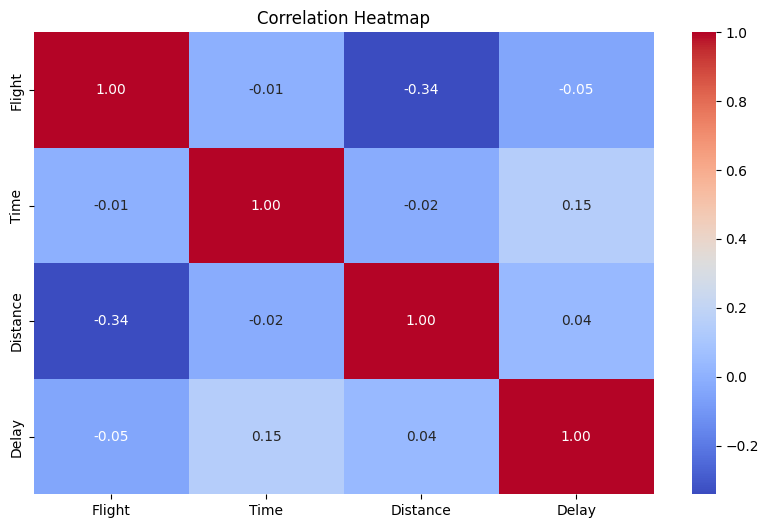

In [38]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Univariate analysis


#### Categorical Variables

##### Count plot 

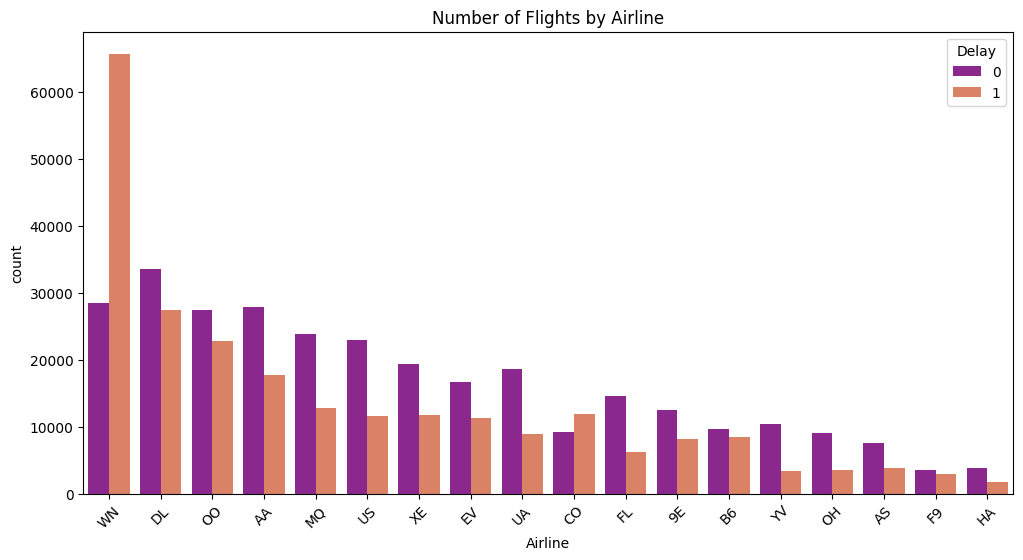

In [39]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Airline', data=df,hue = 'Delay', order=df['Airline'].value_counts().index, palette='plasma',legend=True)
plt.title('Number of Flights by Airline')
plt.xticks(rotation=45)
plt.show()

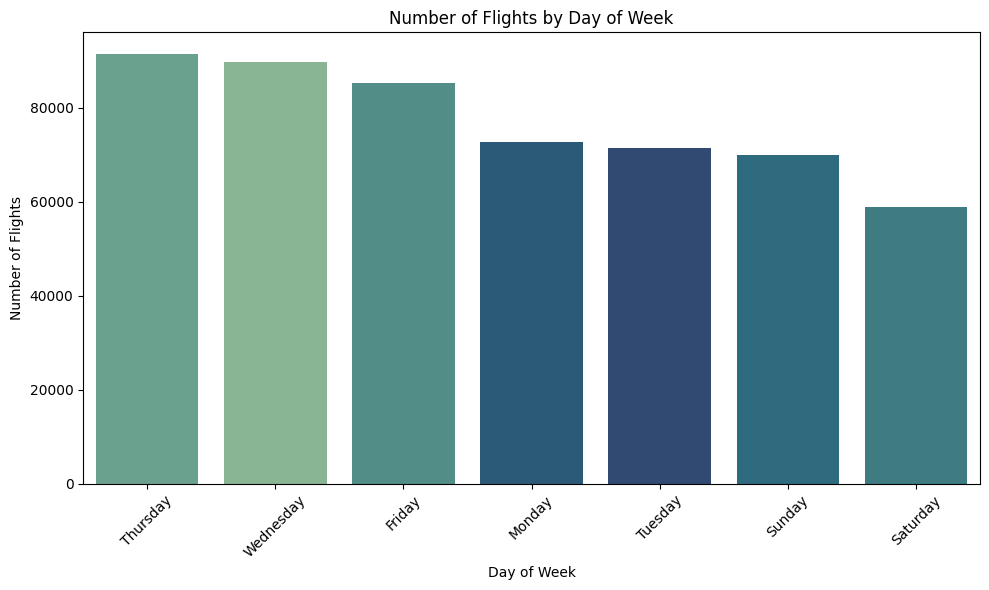

In [40]:
day_of_week_counts = df['Day of Week'].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(x='Day of Week', data=df,hue ='Day of Week',  order=day_of_week_counts.index, palette='crest',legend=False)
plt.title('Number of Flights by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Pie Chart

Text(0.5, 1.0, 'Number of each Airline')

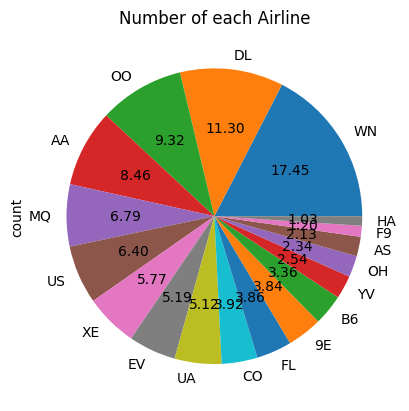

In [41]:
df['Airline'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title('Number of each Airline')

#### Numerical Variable

##### Histogram

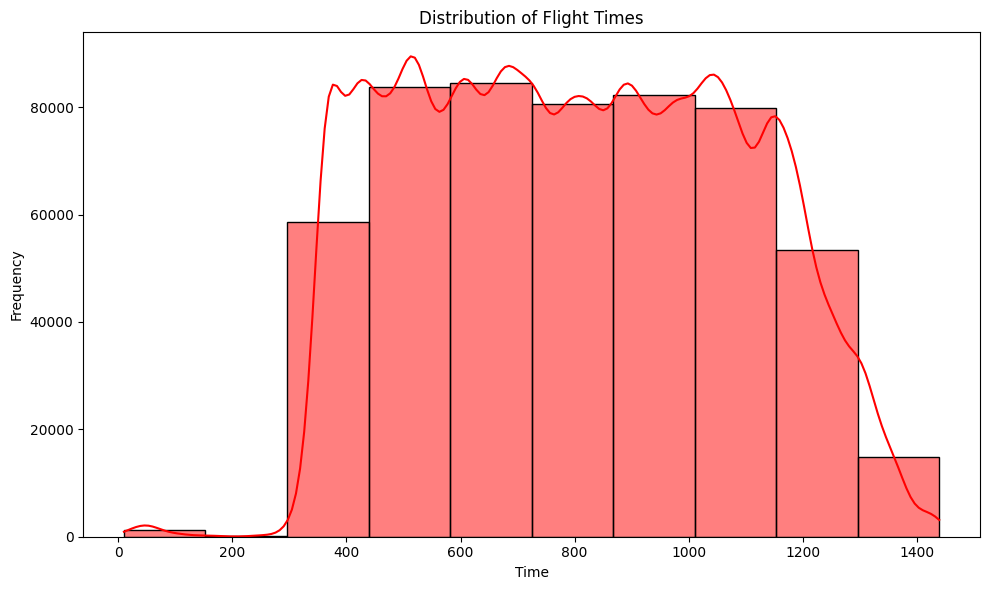

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Time'], kde=True, bins=10, color='Red')
plt.title('Distribution of Flight Times')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

##### Displot

<Figure size 1000x600 with 0 Axes>

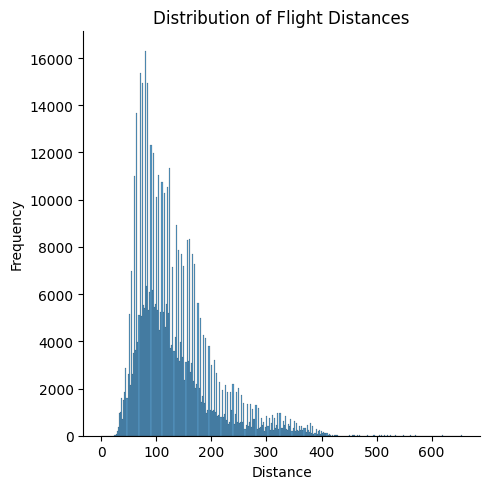

In [43]:
plt.figure(figsize=(10, 6))
sns.displot(df['Distance'])
plt.title('Distribution of Flight Distances')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


##### Box Plot

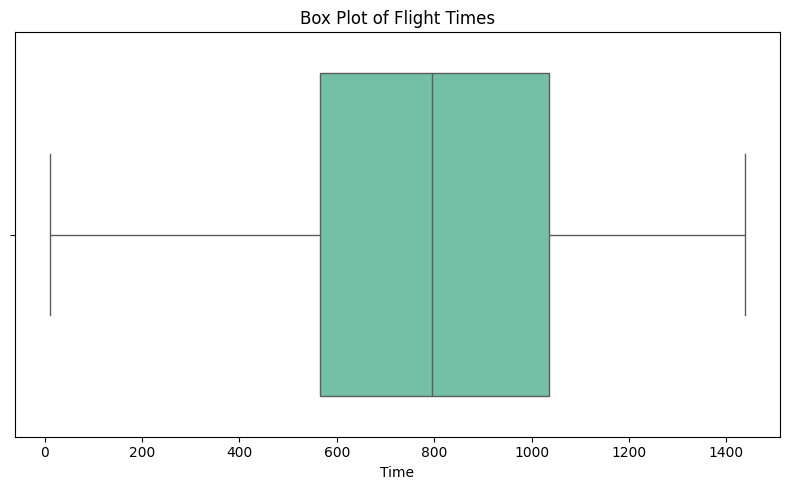

In [44]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Time'], color='mediumaquamarine')
plt.title('Box Plot of Flight Times')
plt.xlabel('Time')
plt.tight_layout()
plt.show()

### Bivariate Analysis

#### Bar Chart

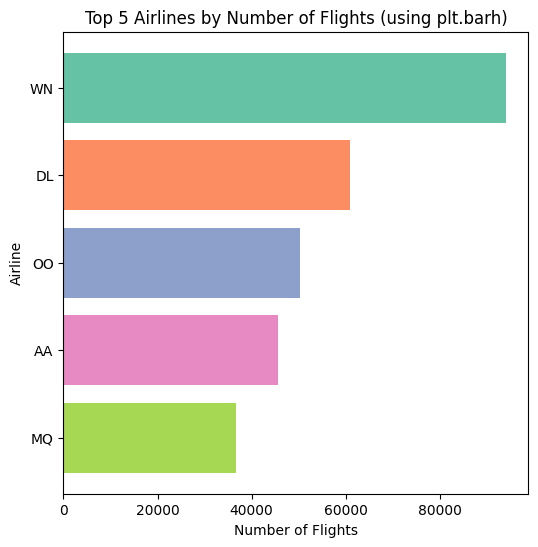

In [45]:
flights = df['Airline'].value_counts()
top_5_airlines = df['Airline'].value_counts().head(5)
plt.figure(figsize=(6, 6))
plt.barh(y=top_5_airlines.index, width=top_5_airlines.values, color=sns.color_palette('Set2', 5))
plt.title('Top 5 Airlines by Number of Flights (using plt.barh)')
plt.xlabel('Number of Flights')
plt.ylabel('Airline')
plt.gca().invert_yaxis() 
plt.show()

#### Barplot

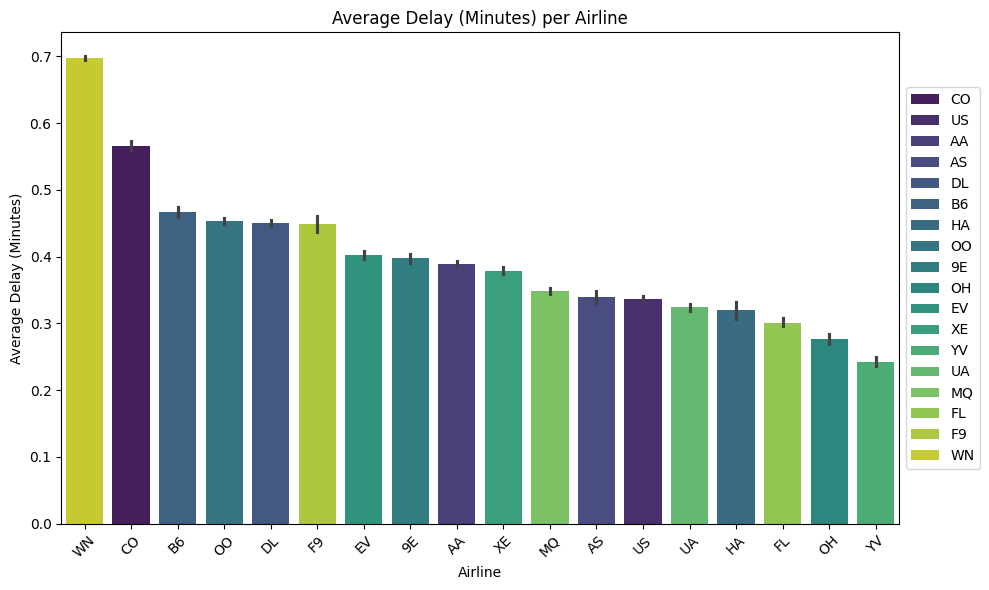

In [46]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Airline', y='Delay', data=df,hue = 'Airline',order=df.groupby('Airline')['Delay'].mean()
            .sort_values(ascending=False).index, palette='viridis',legend=True)
plt.title('Average Delay (Minutes) per Airline')
plt.xlabel('Airline')
plt.ylabel('Average Delay (Minutes)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Hstogram

In [47]:
df.head()

,Airline,Flight,Origin Airport,Destination Airport,Time,Distance,Delay,Day of Week,Route
0,CO,269,SFO,IAH,15,205,1,Wednesday,SFO-IAH
1,US,1558,PHX,CLT,15,222,1,Wednesday,PHX-CLT
2,AA,2400,LAX,DFW,20,165,1,Wednesday,LAX-DFW
3,AA,2466,SFO,DFW,20,195,1,Wednesday,SFO-DFW
4,AS,108,ANC,SEA,30,202,0,Wednesday,ANC-SEA


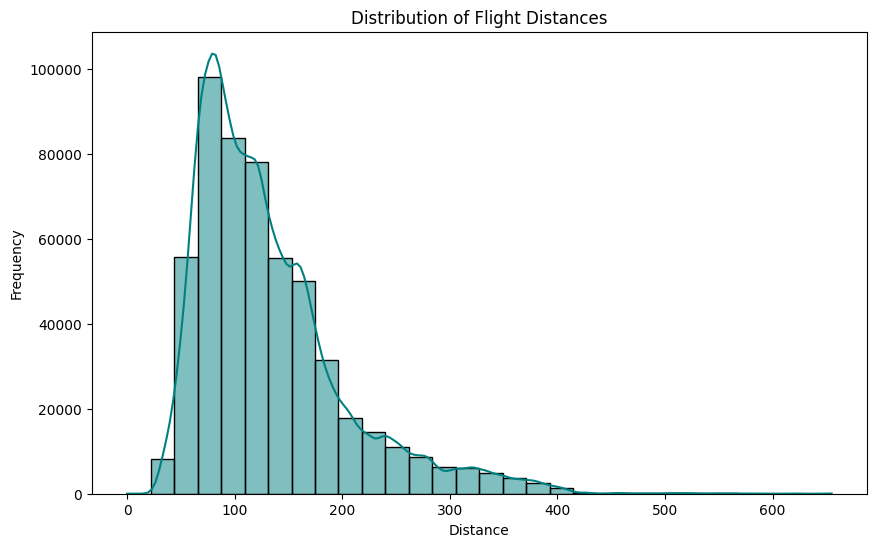

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Distance'], bins=30, kde=True, color='teal')
plt.title('Distribution of Flight Distances')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()


#### Boxplot

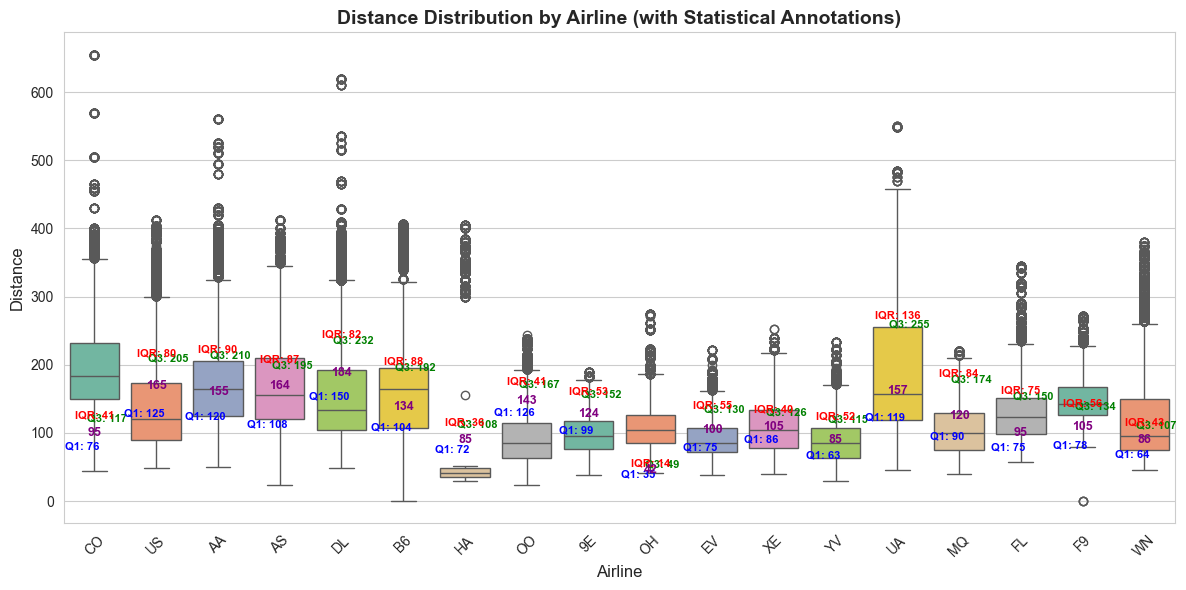

In [83]:
plt.figure(figsize=(12, 6))

# Use palette='Set2' or 'Pastel1' so the background is light enough for your text to show
sns.boxplot(x='Airline', y='Distance', data=df, palette='Set2', hue='Airline', legend=False)

plt.title('Distance Distribution by Airline (with Statistical Annotations)', fontsize=14, fontweight='bold')
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.xticks(rotation=45)

# --- Your Calculation Logic (Kept Exactly the Same) ---
stats = df.groupby('Airline')['Distance'].quantile([0.25, 0.5, 0.75]).unstack()
stats.columns = ['Q1', 'Median', 'Q3']
stats['IQR'] = stats['Q3'] - stats['Q1']

for i, airline in enumerate(stats.index):
    q1 = stats.loc[airline, 'Q1']
    q3 = stats.loc[airline, 'Q3']
    iqr = stats.loc[airline, 'IQR']
    median = stats.loc[airline, 'Median']

    # Text annotations
    plt.text(i - 0.2, q1, f'Q1: {q1:.0f}', horizontalalignment='center', color='blue', weight='bold', fontsize=8)
    plt.text(i + 0.2, q3, f'Q3: {q3:.0f}', horizontalalignment='center', color='green', weight='bold', fontsize=8)
    plt.text(i, q3 + (q3 - q1) * 0.1, f'IQR: {iqr:.0f}', horizontalalignment='center', color='red', weight='bold', fontsize=8)
    plt.text(i, median, f'{median:.0f}', horizontalalignment='center', color='purple', weight='bold', fontsize=9) # Adjusted median placement slightly

plt.tight_layout()
plt.show()

#### Barplot

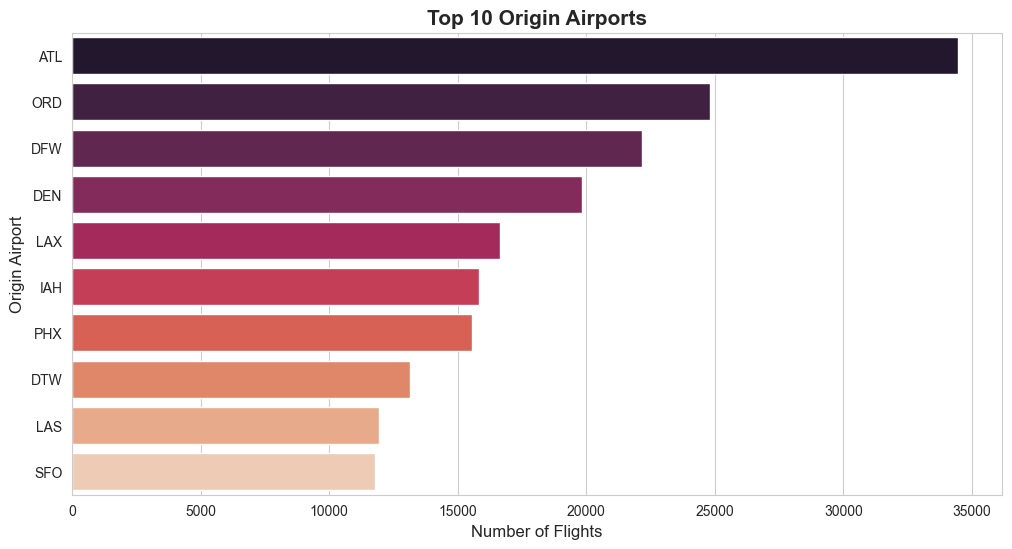

In [82]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
top_origins = df['Origin Airport'].value_counts().nlargest(10)
sns.barplot(
    x=top_origins.values, 
    y=top_origins.index, 
    palette='rocket', 
    hue=top_origins.index, 
    legend=False
)
plt.title('Top 10 Origin Airports', fontsize=15, fontweight='bold')
plt.xlabel('Number of Flights', fontsize=12)
plt.ylabel('Origin Airport', fontsize=12)
plt.show()

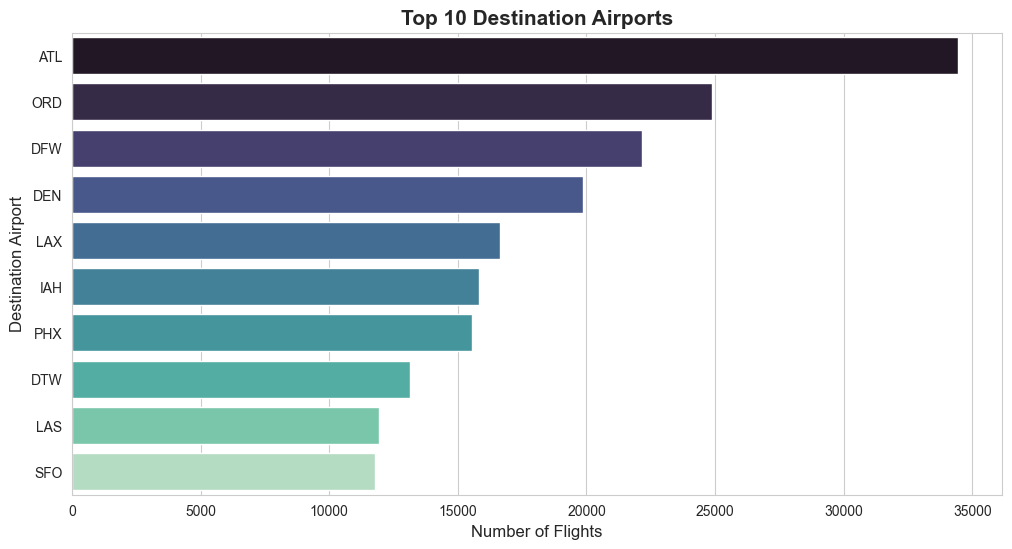

In [81]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
top_destinations = df['Destination Airport'].value_counts().nlargest(10)
sns.barplot(
    x=top_destinations.values, 
    y=top_destinations.index, 
    palette='mako', 
    hue=top_destinations.index, 
    legend=False
)
plt.title('Top 10 Destination Airports', fontsize=15, fontweight='bold')
plt.xlabel('Number of Flights', fontsize=12)
plt.ylabel('Destination Airport', fontsize=12)
plt.show()

#### PieChart

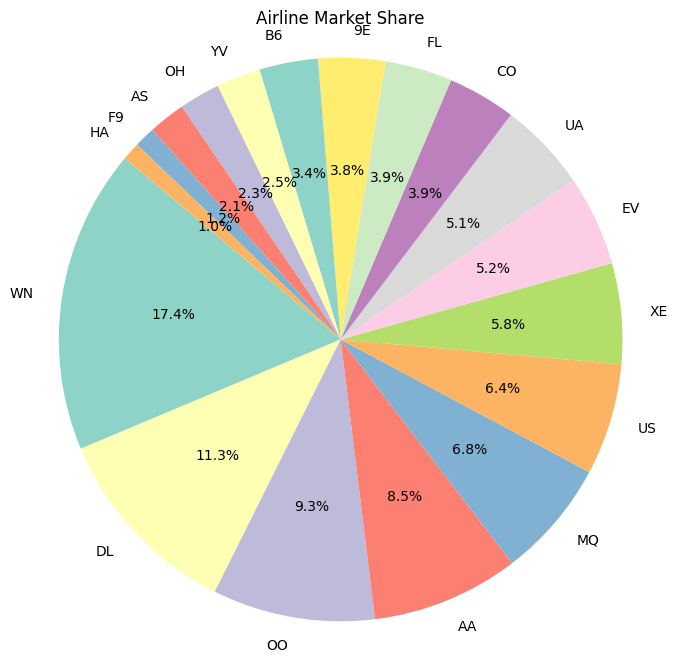

In [52]:
airline_counts = df['Airline'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(airline_counts.values, labels=airline_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))
plt.title('Airline Market Share')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### Pairplot

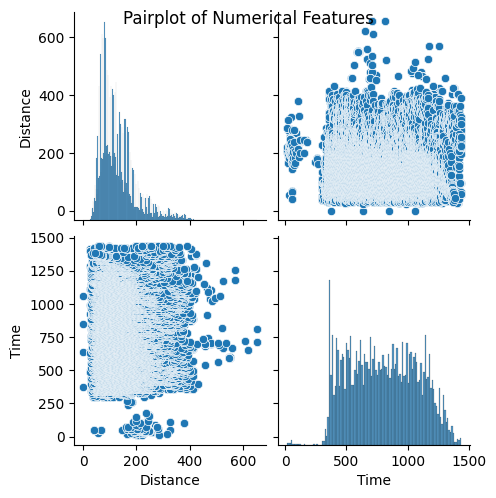

In [53]:
sns.pairplot(df[['Distance', 'Time']])  # Add more numeric columns if available
plt.suptitle('Pairplot of Numerical Features')
plt.show()

In [54]:
max_time_flight = df[df['Time'] == df['Time'].max()]
min_time_flight = df[df['Time'] == df['Time'].min()]
print("Longest Flight:\n", max_time_flight)
print("Shortest Flight:\n", min_time_flight)


Longest Flight:
        Airline  Flight Origin Airport Destination Airport  Time  Distance  \
17609       B6     739            JFK                 PSE  1439       223   
17610       FL     328            SFO                 ATL  1439       270   
17611       UA      78            HNL                 SFO  1439       313   
35654       B6     480            LAX                 BOS  1439       321   
35655       B6     717            JFK                 SJU  1439       220   
...        ...     ...            ...                 ...   ...       ...   
539378      CO     178            OGG                 SNA  1439       326   
539379      FL     398            SEA                 ATL  1439       305   
539380      FL     609            SFO                 MKE  1439       255   
539381      UA      78            HNL                 SFO  1439       313   
539382      US    1442            LAX                 PHL  1439       301   

        Delay Day of Week    Route  
17609       0   Wedne

In [55]:
busiest_day = df['Day of Week'].value_counts()
print("Flights per Day:\n", busiest_day)


Flights per Day:
 Day of Week
Thursday     91445
Wednesday    89746
Friday       85248
Monday       72769
Tuesday      71340
Sunday       69879
Saturday     58956
Name: count, dtype: int64


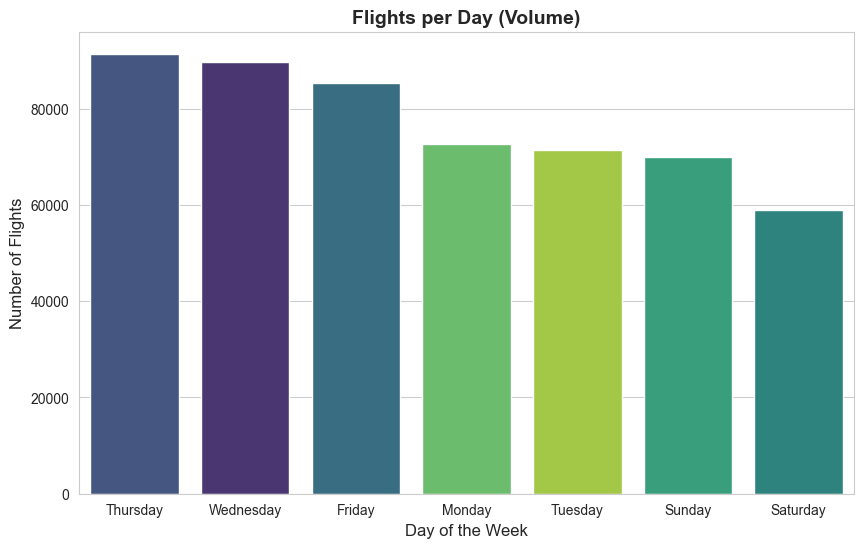

In [79]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Day of Week', data=df, order=busiest_day.index, palette='viridis', hue='Day of Week', legend=False)
plt.title("Flights per Day (Volume)", fontsize=14, fontweight='bold')
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Number of Flights", fontsize=12)
plt.show()

In [57]:
most_repeated_route = df['Route'].value_counts().head()
print("Most Repeated Routes:\n", most_repeated_route)


Most Repeated Routes:
 Route
LAX-SFO    1079
SFO-LAX    1077
OGG-HNL     982
HNL-OGG     951
SAN-LAX     935
Name: count, dtype: int64


### Multi-Variate analysis

#### Corelation Heatmap

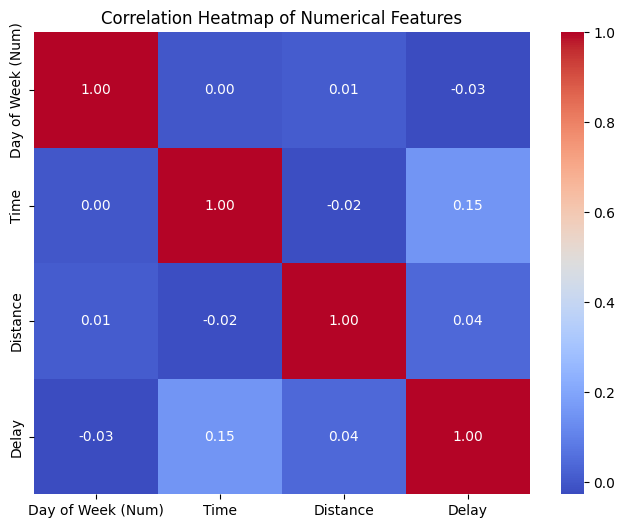

In [58]:
day_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

df['Day of Week (Num)'] = df['Day of Week'].map(day_mapping)
# Compute correlation matrix
corr_matrix = df[['Day of Week (Num)', 'Time', 'Distance', 'Delay']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

#### Pairplot

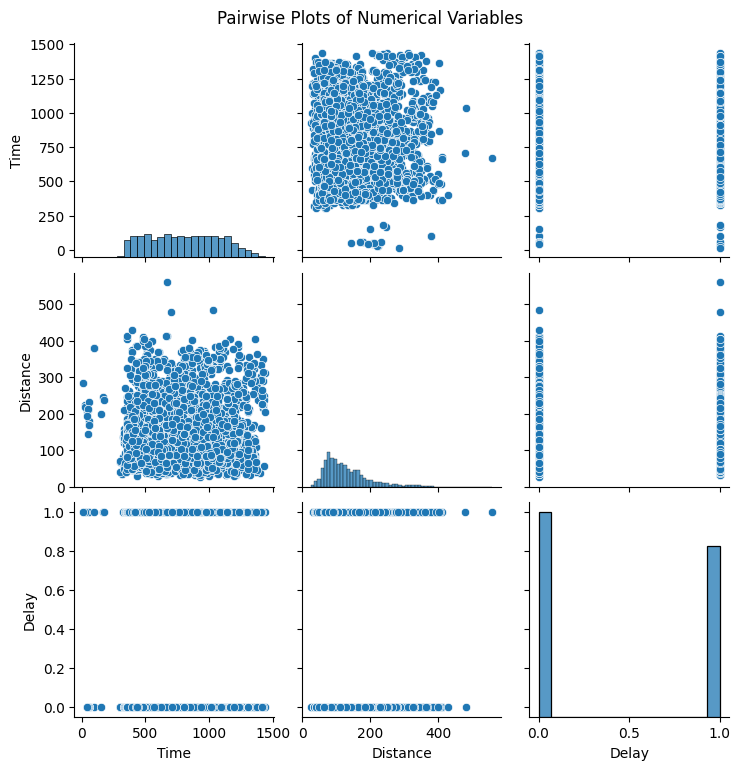

In [59]:
# Sample to reduce rendering time
df_sample = df.sample(5000, random_state=1)

# Plot pairplot
sns.pairplot(df_sample[['Day of Week', 'Time', 'Distance', 'Delay']])
plt.suptitle('Pairwise Plots of Numerical Variables', y=1.02)
plt.show()

#### Barplot: Delay by Airline

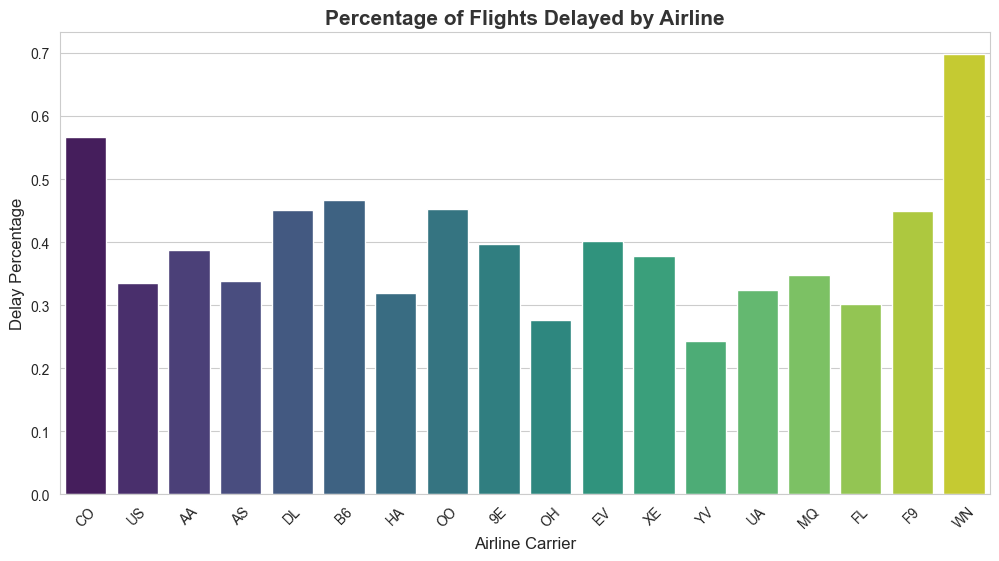

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='Airline', y='Delay', data=df, estimator='mean', errorbar=None, palette='viridis', hue='Airline', legend=False)
plt.title("Percentage of Flights Delayed by Airline", fontsize=15, fontweight='bold', color='#333333')
plt.xlabel("Airline Carrier", fontsize=12)
plt.ylabel("Delay Percentage", fontsize=12)
plt.xticks(rotation=45) 
plt.show()

#### Stacked Bar plot: Airline Vs Delay Category

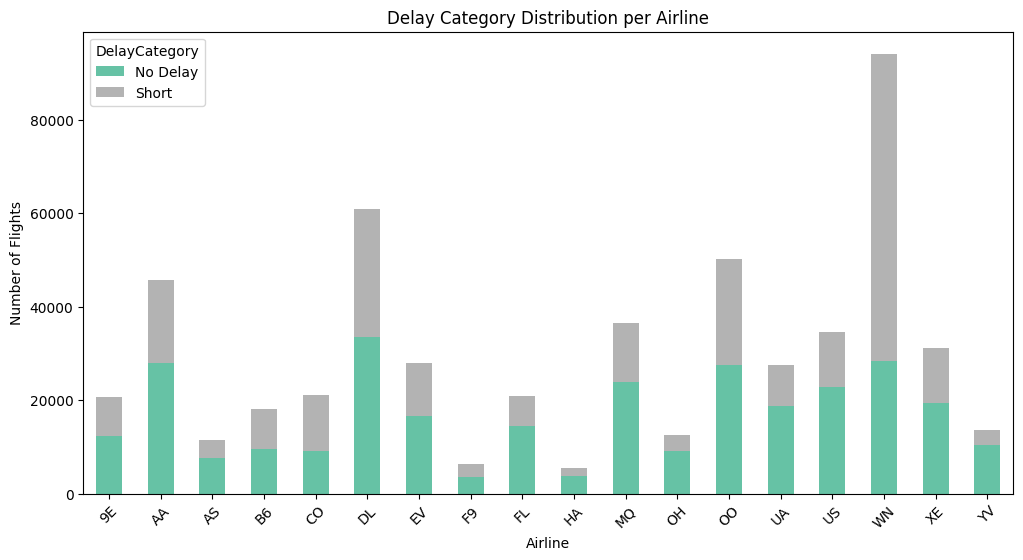

In [62]:
# Create delay categories
df['DelayCategory'] = pd.cut(df['Delay'], bins=[-1, 0, 15, 60, 300], 
                             labels=['No Delay', 'Short', 'Medium', 'Long'])

# Cross-tabulation
delay_counts = pd.crosstab(df['Airline'], df['DelayCategory'])

# Plot stacked bar chart
delay_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title('Delay Category Distribution per Airline')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.show()


## ANOVA analysis

#### Boxplot: Delay by Airline

C:\Users\amitm\AppData\Local\Temp\ipykernel_13040\2524743842.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Airline', y='Delay', palette='Set2')


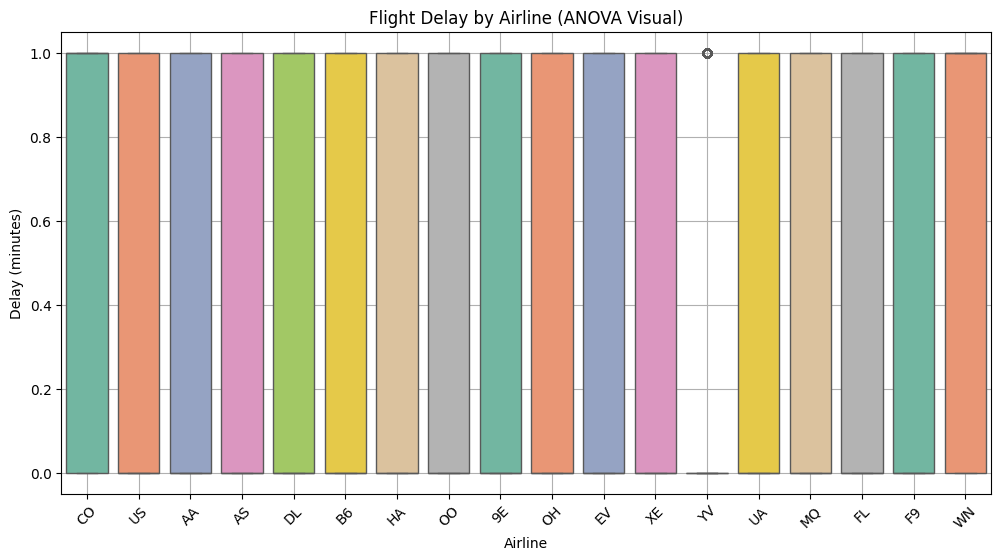

In [63]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Airline', y='Delay', palette='Set2')
plt.title('Flight Delay by Airline (ANOVA Visual)')
plt.ylabel("Delay (minutes)")
plt.xlabel("Airline")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### Boxplot: Delay by Day of the Week

C:\Users\amitm\AppData\Local\Temp\ipykernel_13040\3262601972.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Day of Week', y='Delay', order=day_order, palette='Set3')


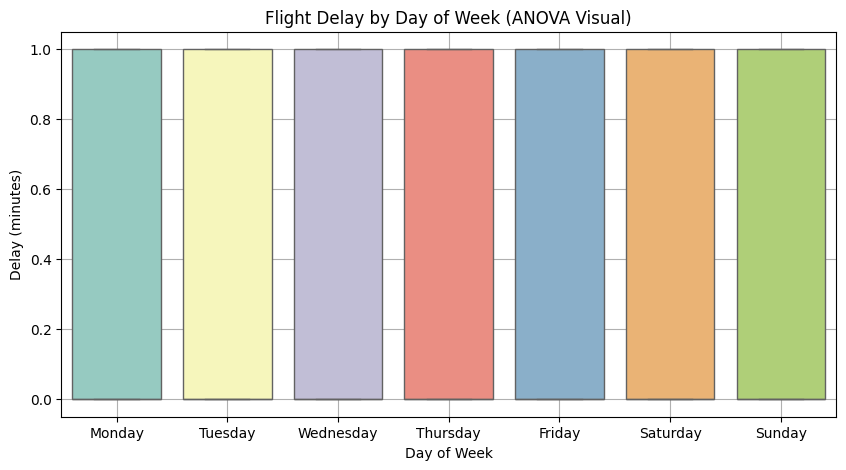

In [64]:
# Ensure correct day order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Day of Week', y='Delay', order=day_order, palette='Set3')
plt.title('Flight Delay by Day of Week (ANOVA Visual)')
plt.ylabel("Delay (minutes)")
plt.xlabel("Day of Week")
plt.grid(True)
plt.show()

#### Mean plot with Error Bars (Mean ± SEM)

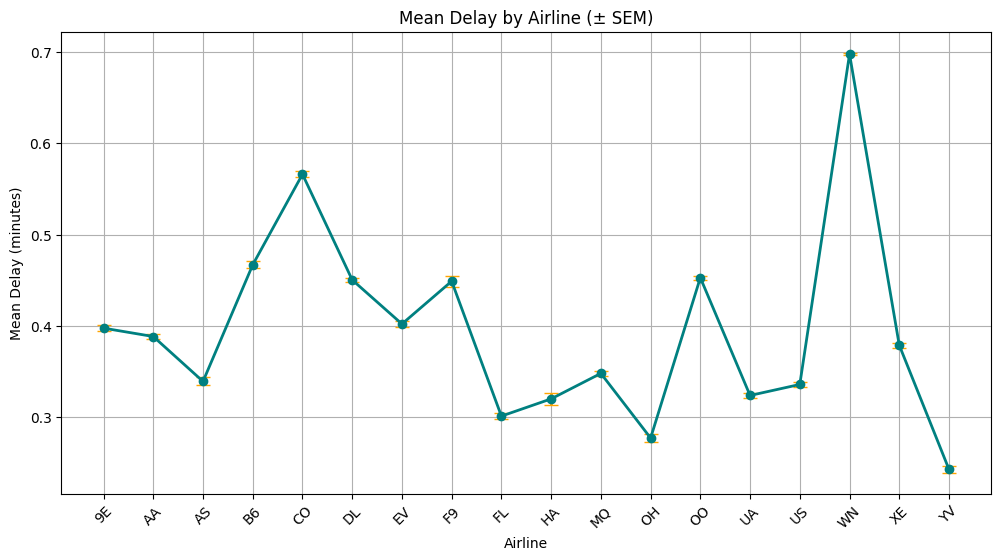

In [65]:
# Airline mean and SEM(Standard Error mean)
airline_means = df.groupby('Airline')['Delay'].mean()
airline_sems = df.groupby('Airline')['Delay'].sem()

plt.figure(figsize=(12, 6))
plt.errorbar(airline_means.index, airline_means.values, yerr=airline_sems.values,
             fmt='o-', capsize=5, color='teal', ecolor='orange', linewidth=2)
plt.title('Mean Delay by Airline (± SEM)')
plt.xlabel('Airline')
plt.ylabel('Mean Delay (minutes)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


In [66]:
# Use categorical columns
categorical_cols = ['Airline', 'Origin Airport', 'Destination Airport', 'Day of Week']

# Create transactions
transactions = []
for _, row in df[categorical_cols].iterrows():
    transaction = [f"{col}={row[col]}" for col in categorical_cols]
    transactions.append(transaction)


## Mining Association Rules (FP-Growth)
We generate association rules to find hidden relationships in the flight data. Instead of just looking at "Support" (frequency), we focus on **Lift**.

### **Why Lift?**
* **Lift > 1.0:** Indicates a **strong positive correlation**. It means the occurrence of the first event (Antecedent) *increases* the probability of the second event (Consequent) happening.
* **Goal:** Identify specific routes or carriers where delays are not just random, but structurally likely.

In [73]:
# Encode transactions
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_trans = pd.DataFrame(te_ary, columns=te.columns_)

# Run FP-Growth
frequent_itemsets = fpgrowth(df_trans, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)


In [74]:
# Display results
print("Frequent Itemsets:")
display(frequent_itemsets.sort_values(by='support', ascending=False).head())

print("\nAssociation Rules:")
display(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='lift', ascending=False).head())

Frequent Itemsets:


,support,itemsets
72,0.174453,(Airline=WN)
77,0.169536,(Day of Week=Thursday)
0,0.166386,(Day of Week=Wednesday)
78,0.158047,(Day of Week=Friday)
81,0.134912,(Day of Week=Monday)



Association Rules:


,antecedents,consequents,support,confidence,lift
76,(Airline=CO),(Origin Airport=IAH),0.011684,0.298418,10.173934
77,(Origin Airport=IAH),(Airline=CO),0.011684,0.398331,10.173934
3,(Destination Airport=IAH),(Airline=CO),0.011682,0.398318,10.173606
2,(Airline=CO),(Destination Airport=IAH),0.011682,0.298371,10.173606
85,(Airline=US),(Origin Airport=CLT),0.013150,0.205594,9.960839


In [75]:
top_rules = rules.sort_values(by='lift', ascending=False).head(10)

top_rules['support'] = top_rules['support'].round(3)
top_rules['confidence'] = top_rules['confidence'].round(3)
top_rules['lift'] = top_rules['lift'].round(3)

# Display just the relevant columns
display(top_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

,antecedents,consequents,support,confidence,lift
76,(Airline=CO),(Origin Airport=IAH),0.012,0.298,10.174
77,(Origin Airport=IAH),(Airline=CO),0.012,0.398,10.174
3,(Destination Airport=IAH),(Airline=CO),0.012,0.398,10.174
2,(Airline=CO),(Destination Airport=IAH),0.012,0.298,10.174
85,(Airline=US),(Origin Airport=CLT),0.013,0.206,9.961
84,(Origin Airport=CLT),(Airline=US),0.013,0.637,9.961
10,(Airline=US),(Destination Airport=CLT),0.013,0.206,9.958
9,(Destination Airport=CLT),(Airline=US),0.013,0.637,9.958
4,(Airline=XE),(Destination Airport=IAH),0.015,0.255,8.691
5,(Destination Airport=IAH),(Airline=XE),0.015,0.502,8.691


## Visualizing Delay Patterns (Network Graph)
Tabular data can be difficult to interpret at a glance. We visualize the top **Strongest Associations** using a Directed Network Graph.

### **Graph Legend:**
* **Nodes (Blue Circles):** Represent specific Carriers, Airports, or Time blocks.
* **Edges (Red Arrows):** Represent the "Rule" pointing from Cause $\rightarrow$ Effect.
* **Structure:** Clusters in this graph reveal **"High Risk Zones"**—specific hubs or carriers that are central to delay propagation.

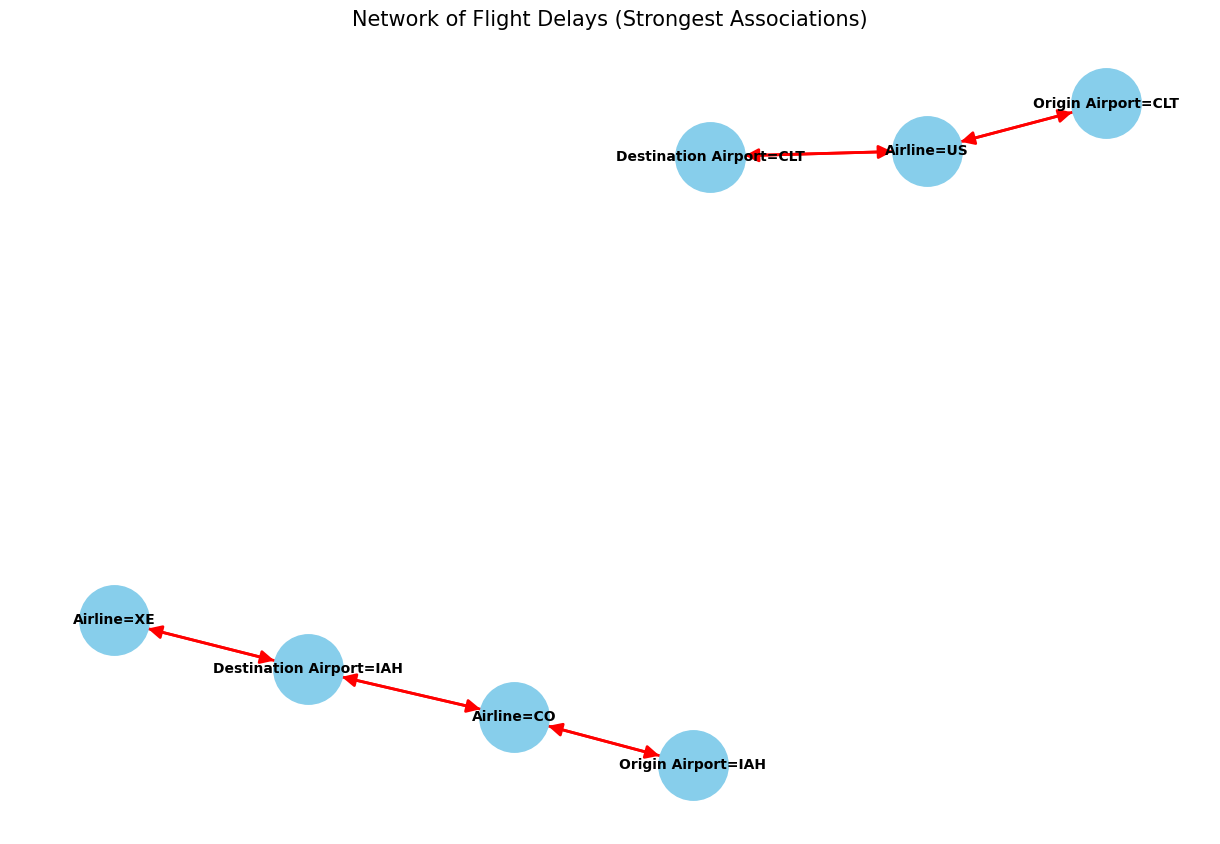

In [76]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.DiGraph()

# Add edges from your top 10 or 20 rules
for i, row in top_rules.iterrows():
    # Convert frozen sets to strings for the graph labels
    start = list(row['antecedents'])[0]
    end = list(row['consequents'])[0]
    weight = row['lift']
    
    G.add_edge(start, end, weight=weight)

# Draw it
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=1)  # Spread nodes out
nx.draw(G, pos, with_labels=True, 
        node_color='skyblue', 
        node_size=2500, 
        edge_color='red',  # Red lines for "Delay" connections
        width=2, 
        font_size=10, 
        font_weight='bold',
        arrowsize=20)

plt.title("Network of Flight Delays (Strongest Associations)", fontsize=15)
plt.show()